# Finance and Economics
The financial world deals with huge amounts of data every day. Machine Learning can be used to detect fraud, predict stock and cryptocurrency prices. These projects show how ML can help make smarter financial decisions.-----Harsh Choudhary

# 1. Credit Card Fraud Detection - ML
# 2. Bitcoin Price Prediction using Machine Learning in Python
# 3. Stock Price Prediction using Machine Learning in Python
# 4. Share Price Forecasting Using Facebook Prophet
# 5. Microsoft Stock Price Prediction with Machine Learning

#  1. Credit Card Fraud Detection - ML

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [102]:
data = pd.read_csv("creditcard.csv")
print(data.head())

     Time   Amount        V1        V2        V3        V4        V5  \
0    9472  2312.21 -0.769429 -1.695573 -1.057825 -0.593995 -0.394797   
1   69263  2119.40 -1.362682 -0.507852 -0.422305 -0.328383 -1.000656   
2  112036   941.61  0.139697 -0.174928  0.755660  1.119328  0.815503   
3   25523  1434.79 -0.412002 -0.366586  0.178398  0.805836 -2.306558   
4  161838    67.94  0.390331 -0.953436  0.470024  0.571687  0.014567   

         V6        V7        V8  ...       V20       V21       V22       V23  \
0  0.361833 -1.298359  0.097476  ... -0.280735  0.308432 -1.010386 -1.116395   
1  0.683221 -0.144557 -0.323802  ...  1.506691  1.476528 -1.136390 -0.638703   
2  0.723510  0.508398 -0.781190  ... -1.555648 -0.512356 -1.729136 -0.112900   
3  0.265966  0.534850 -0.310300  ... -0.791322 -0.375048 -0.667400  0.021497   
4 -0.621816  1.395653 -1.786146  ...  0.023478  0.760261  1.546836 -0.490721   

        V24       V25       V26       V27       V28  Class  
0  0.091700  0.120869  0.

In [103]:
print(data.describe())

                Time        Amount            V1            V2            V3  \
count   10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean    85789.488900   1244.772359      0.012229      0.000890      0.011060   
std     50046.556217    719.391983      0.994933      0.994576      1.006104   
min         5.000000      0.030000     -4.478522     -3.617939     -3.961580   
25%     42392.250000    620.752500     -0.653401     -0.663502     -0.668138   
50%     86083.500000   1235.940000      0.012962     -0.004444      0.008263   
75%    129532.750000   1861.585000      0.687808      0.656344      0.698470   
max    172751.000000   2499.730000      4.147895      4.099450      3.475239   

                 V4            V5            V6            V7            V8  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -0.014405     -0.011332     -0.000345     -0.001380      0.007847   
std        1.003230      0.999864      1.0

In [104]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.1111111111111111
Fraud Cases: 1000
Valid Transactions: 9000


In [105]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count    1000.000000
mean     1258.878710
std       710.395059
min         2.920000
25%       657.400000
50%      1264.660000
75%      1874.220000
max      2499.240000
Name: Amount, dtype: float64

In [106]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


count    9000.000000
mean     1243.204987
std       720.406686
min         0.030000
25%       617.040000
50%      1233.725000
75%      1860.117500
max      2499.730000
Name: Amount, dtype: float64

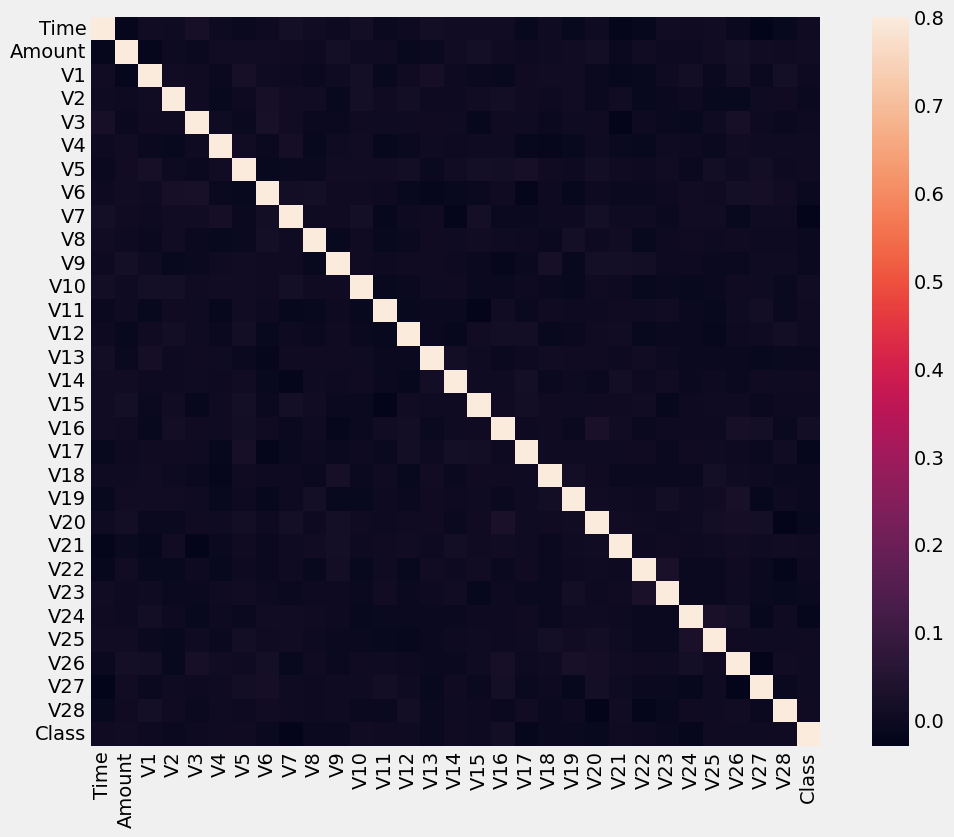

In [107]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [108]:
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)

xData = X.values
yData = Y.values

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

(10000, 30)
(10000,)


In [109]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

yPred = rfc.predict(xTest)

Model Evaluation Metrics:
Accuracy: 0.9090
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Matthews Correlation Coefficient: 0.0000


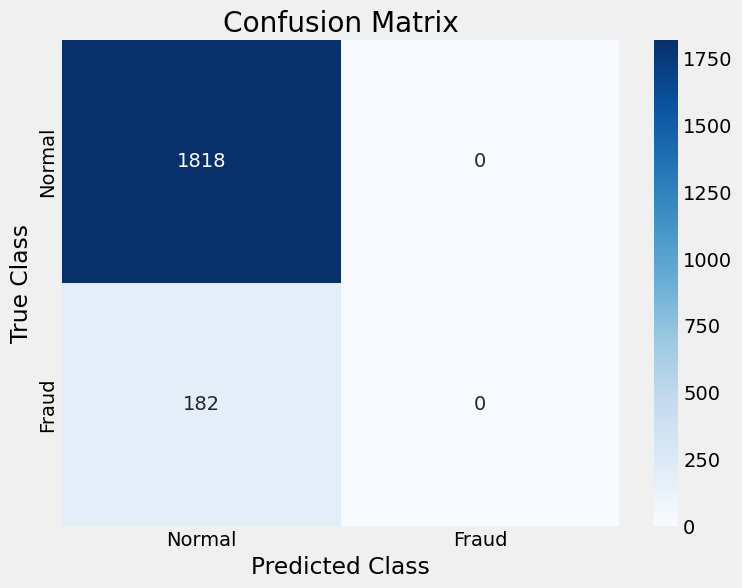

In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation metrics
accuracy = accuracy_score(yTest, yPred)
precision = precision_score(yTest, yPred, zero_division=0)  # <-- fix warning
recall = recall_score(yTest, yPred, zero_division=0)        # <-- safe recall
f1 = f1_score(yTest, yPred, zero_division=0)                # <-- fix warning
mcc = matthews_corrcoef(yTest, yPred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


# 2. Bitcoin Price Prediction using Machine Learning in Python

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [112]:
df = pd.read_csv('bitcoin.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [113]:
df.shape

(3520, 7)

In [114]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3520.000000,3520.000000,3520.000000,3520.000000,3520.000000,3.520000e+03
mean,16092.482827,16467.918626,15690.205456,16109.460706,16109.460706,1.717163e+10
std,17851.627725,18277.200937,17378.957974,17865.998727,17865.998727,1.926619e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,1024.989990,1045.585022,1000.415268,1027.112488,1027.112488,2.206842e+08
50%,8709.403808,8880.675293,8482.153320,8721.874024,8721.874024,1.288747e+10
75%,26894.553711,27320.834961,26601.780762,26916.450195,26916.450195,2.773166e+10
max,73079.375000,73750.070313,71334.093750,73083.500000,73083.500000,3.509679e+11


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3520 entries, 0 to 3519
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3520 non-null   object 
 1   Open       3520 non-null   float64
 2   High       3520 non-null   float64
 3   Low        3520 non-null   float64
 4   Close      3520 non-null   float64
 5   Adj Close  3520 non-null   float64
 6   Volume     3520 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 192.6+ KB


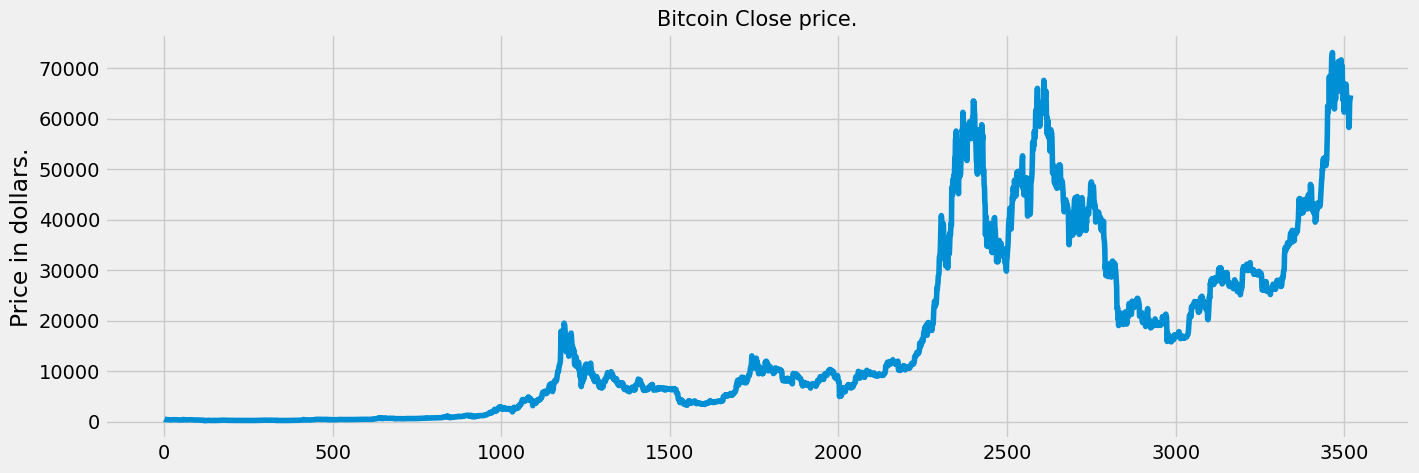

In [116]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [117]:
df[df['Close'] == df['Adj Close']].shape, df.shape

((3520, 7), (3520, 7))

In [118]:
df = df.drop(['Adj Close'], axis=1)

In [119]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

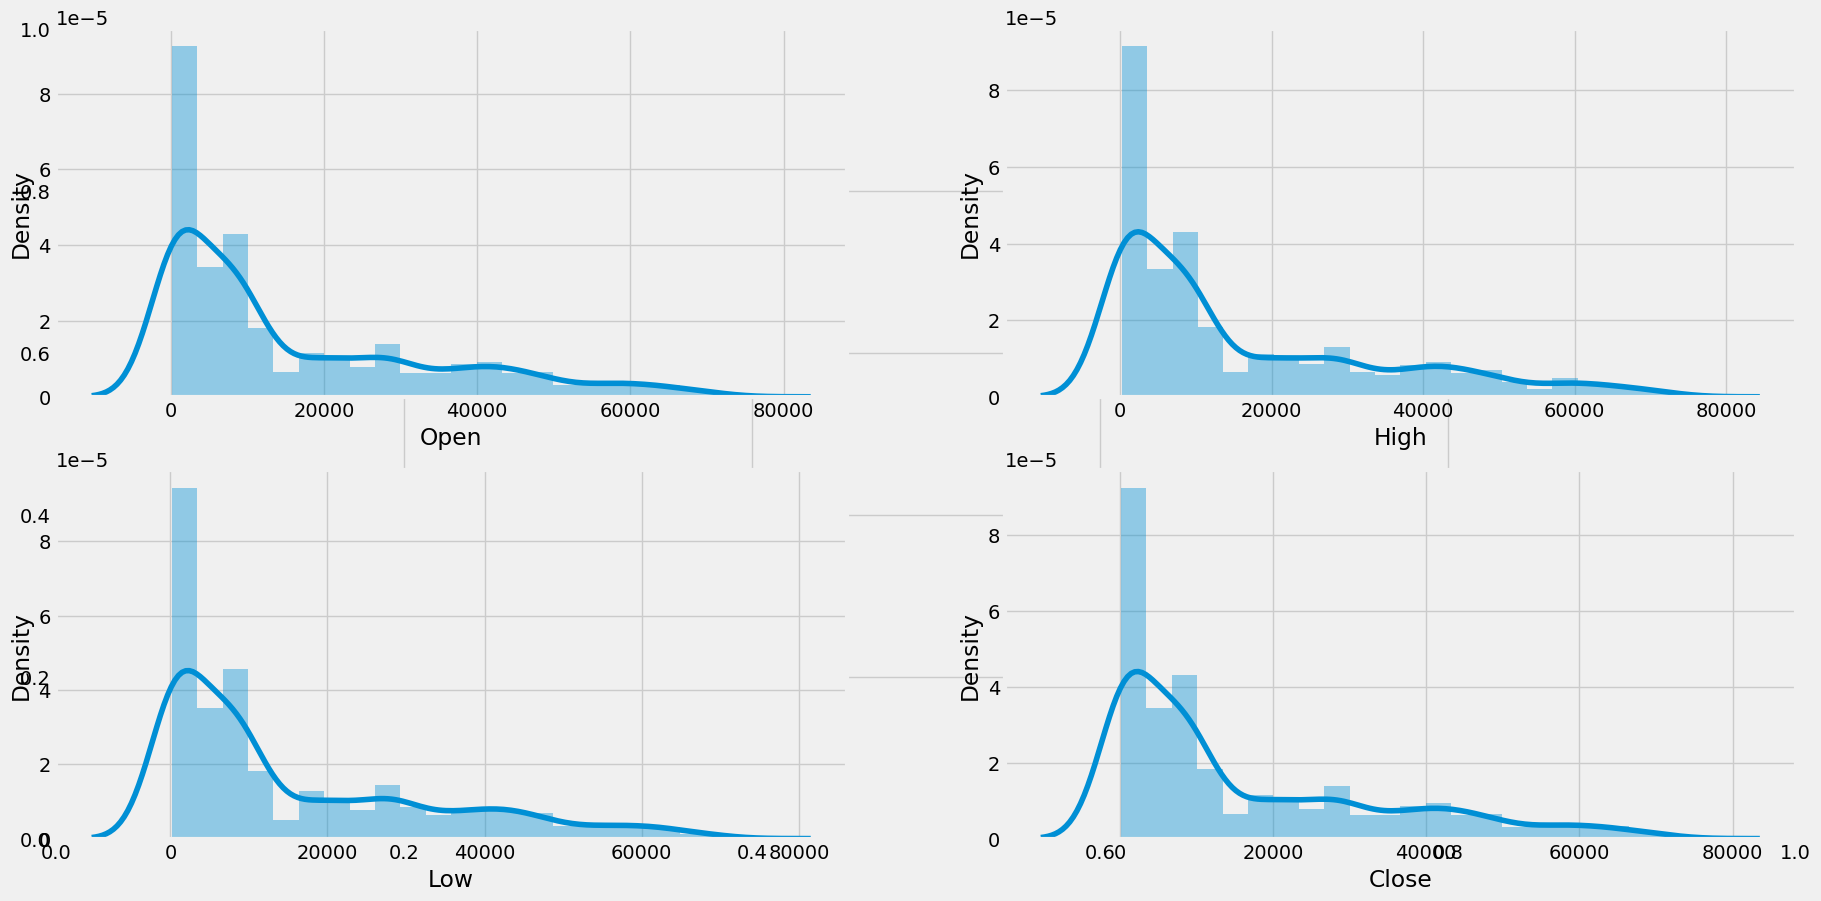

In [120]:
features = ['Open', 'High', 'Low', 'Close']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sn.distplot(df[col])
plt.show()

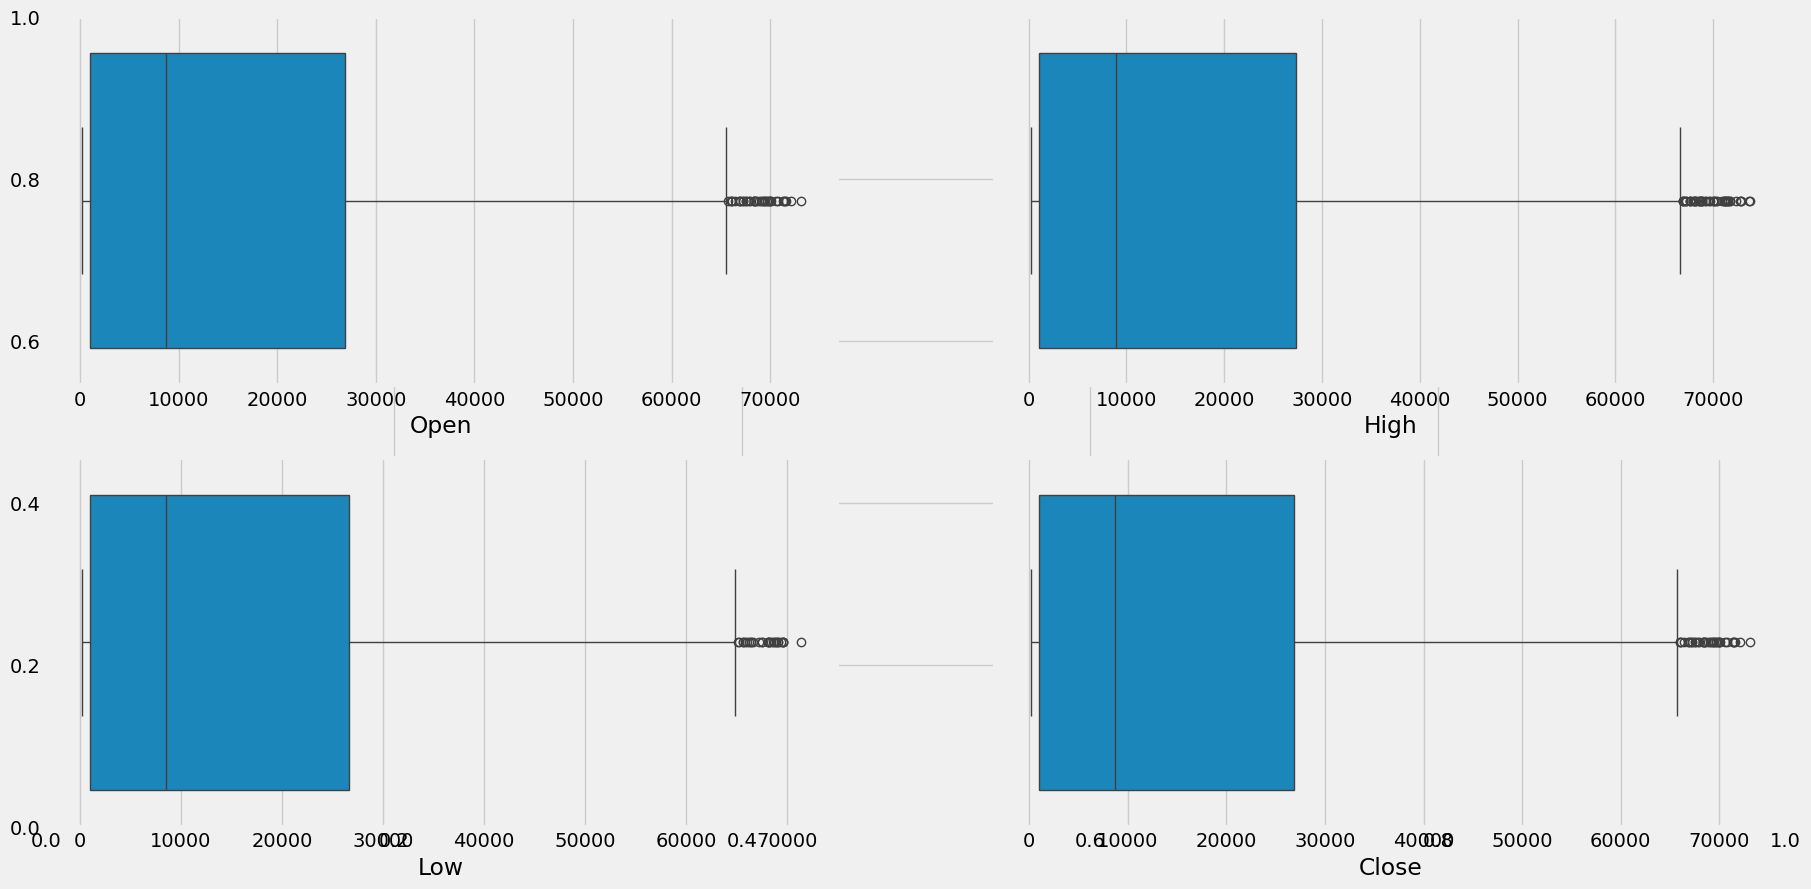

In [121]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sn.boxplot(df[col], orient='h')
plt.show()

In [122]:
splitted = df['Date'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date']) 

df.head()



,Date,Open,High,Low,Close,Volume,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21


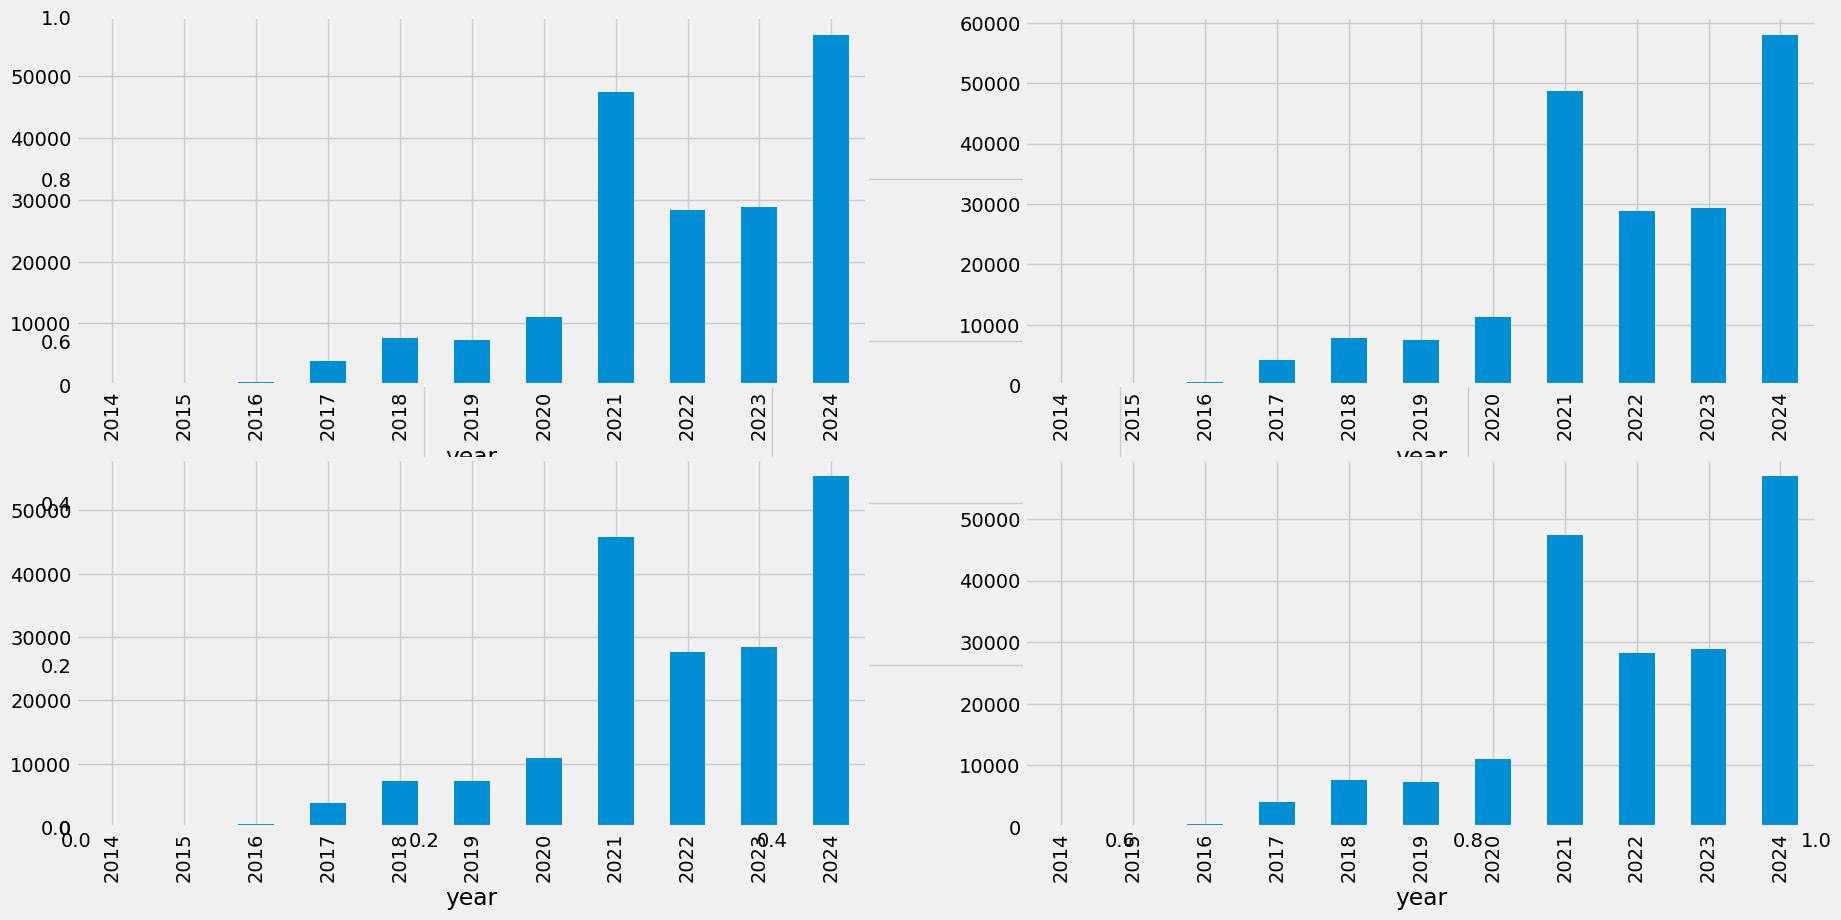

In [123]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [124]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1


In [125]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

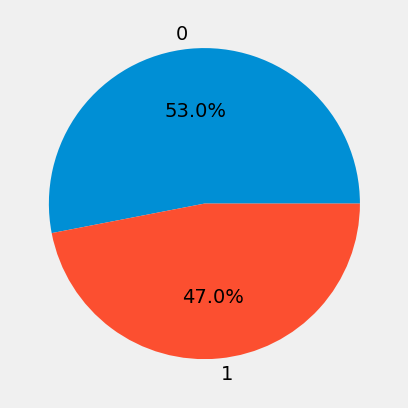

In [126]:
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

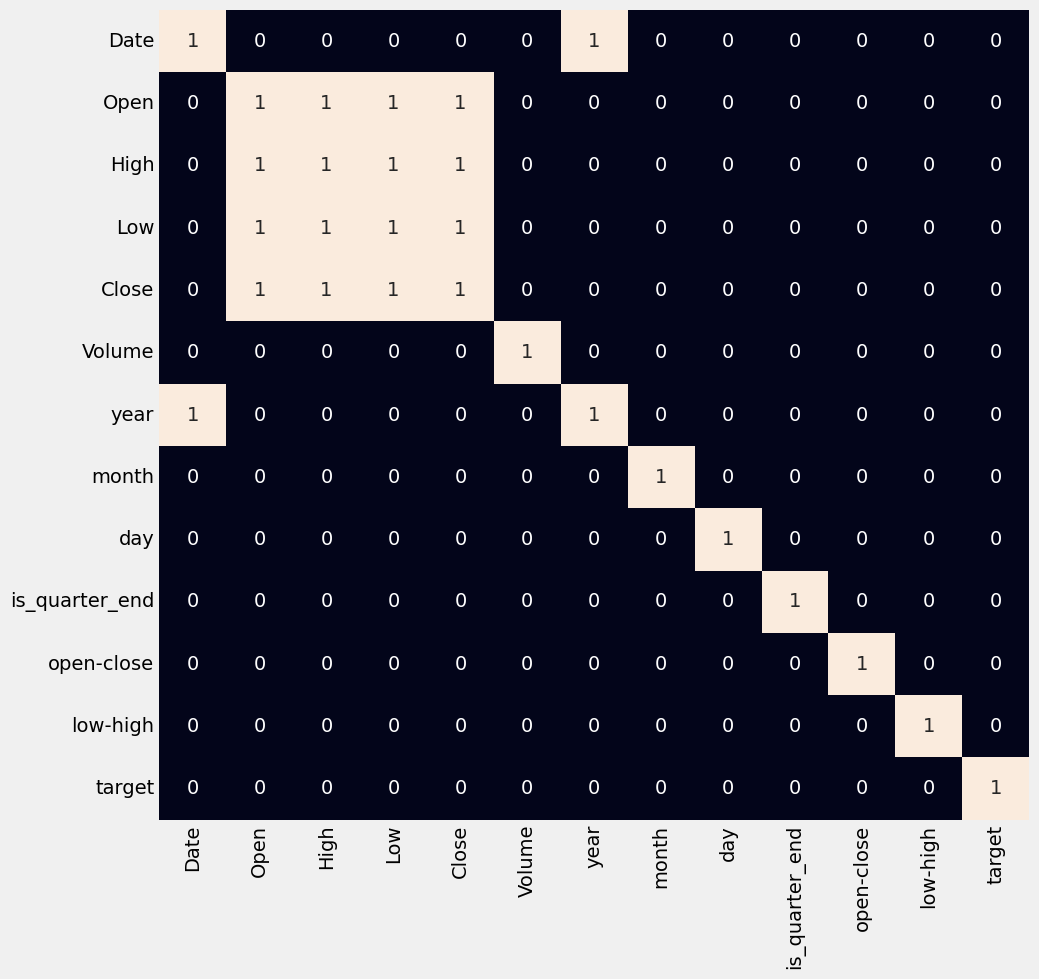

In [127]:
plt.figure(figsize=(10, 10))

sn.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df is already defined
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

# Scaling the features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the data into training and validation (test) sets
X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.3, random_state=42)

# 'test_size=0.3' means 30% of the data will be used for testing, and 70% for training

In [129]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5322502379944998
Validation Accuracy :  0.5318436800824329

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5199403030463295
Validation Accuracy :  0.5433781646424725

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Traini

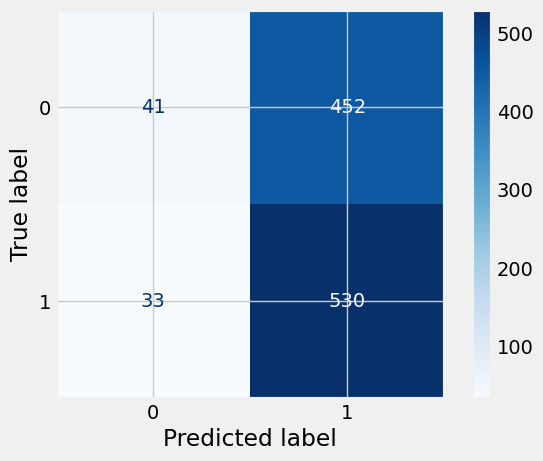

In [130]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid, cmap='Blues')
plt.show()

# 3.Stock Price Prediction using Machine Learning in Python

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [132]:
df = pd.read_csv('Tesla.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800


In [133]:
df.shape

(253, 7)

In [134]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,300.136008,307.486021,292.114058,299.709104,299.709104,8.050938e+07
std,46.139272,46.789896,44.685331,45.788283,45.788283,2.546595e+07
min,207.949997,217.973328,206.856674,209.386673,209.386673,3.504270e+07
25%,266.513336,273.166656,260.723328,266.923340,266.923340,6.255570e+07
50%,298.500000,303.709991,289.130005,296.666656,296.666656,7.695630e+07
75%,335.600006,344.950012,327.510010,336.336670,336.336670,9.347310e+07
max,411.470001,414.496674,405.666656,409.970001,409.970001,1.885563e+08


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


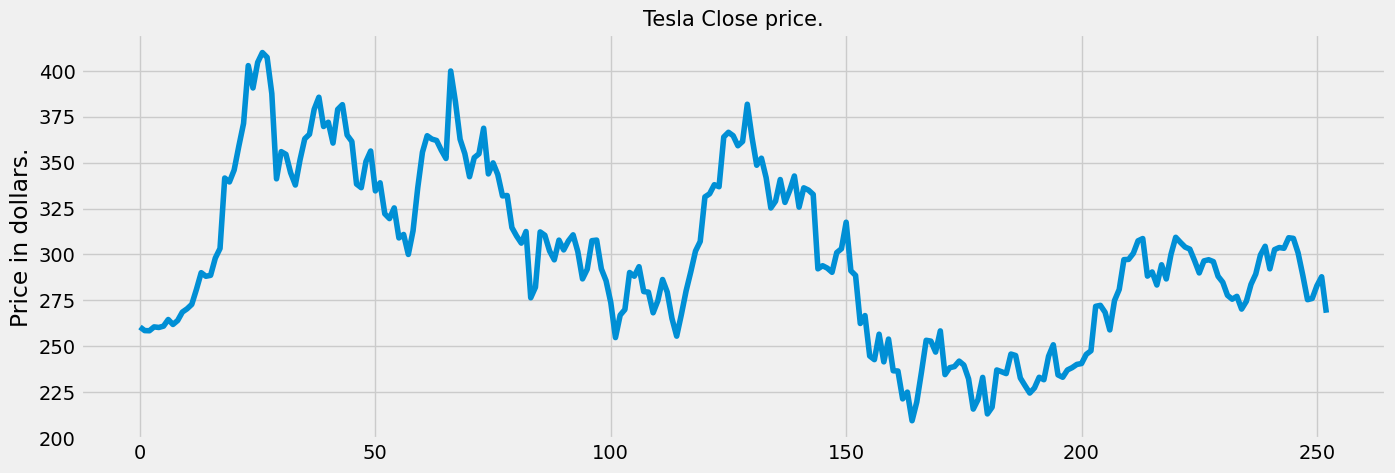

In [136]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [137]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800


In [138]:
df[df['Close'] == df['Adj Close']].shape

(253, 7)

In [139]:
df = df.drop(['Adj Close'], axis=1)

In [140]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

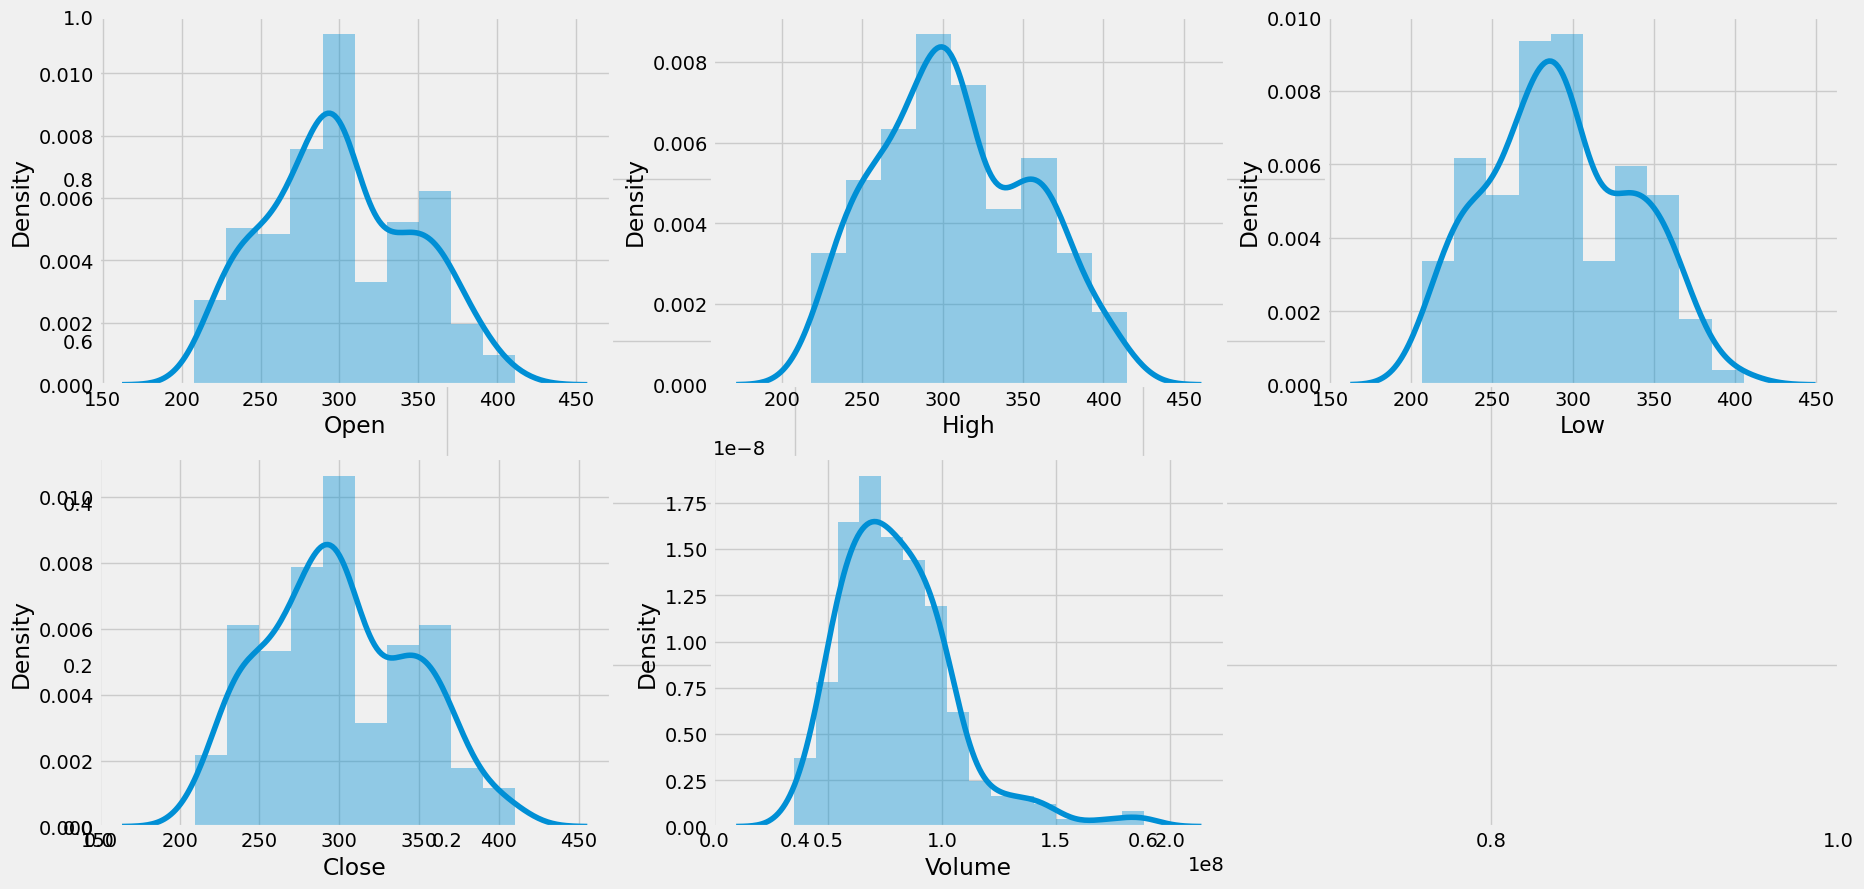

In [141]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

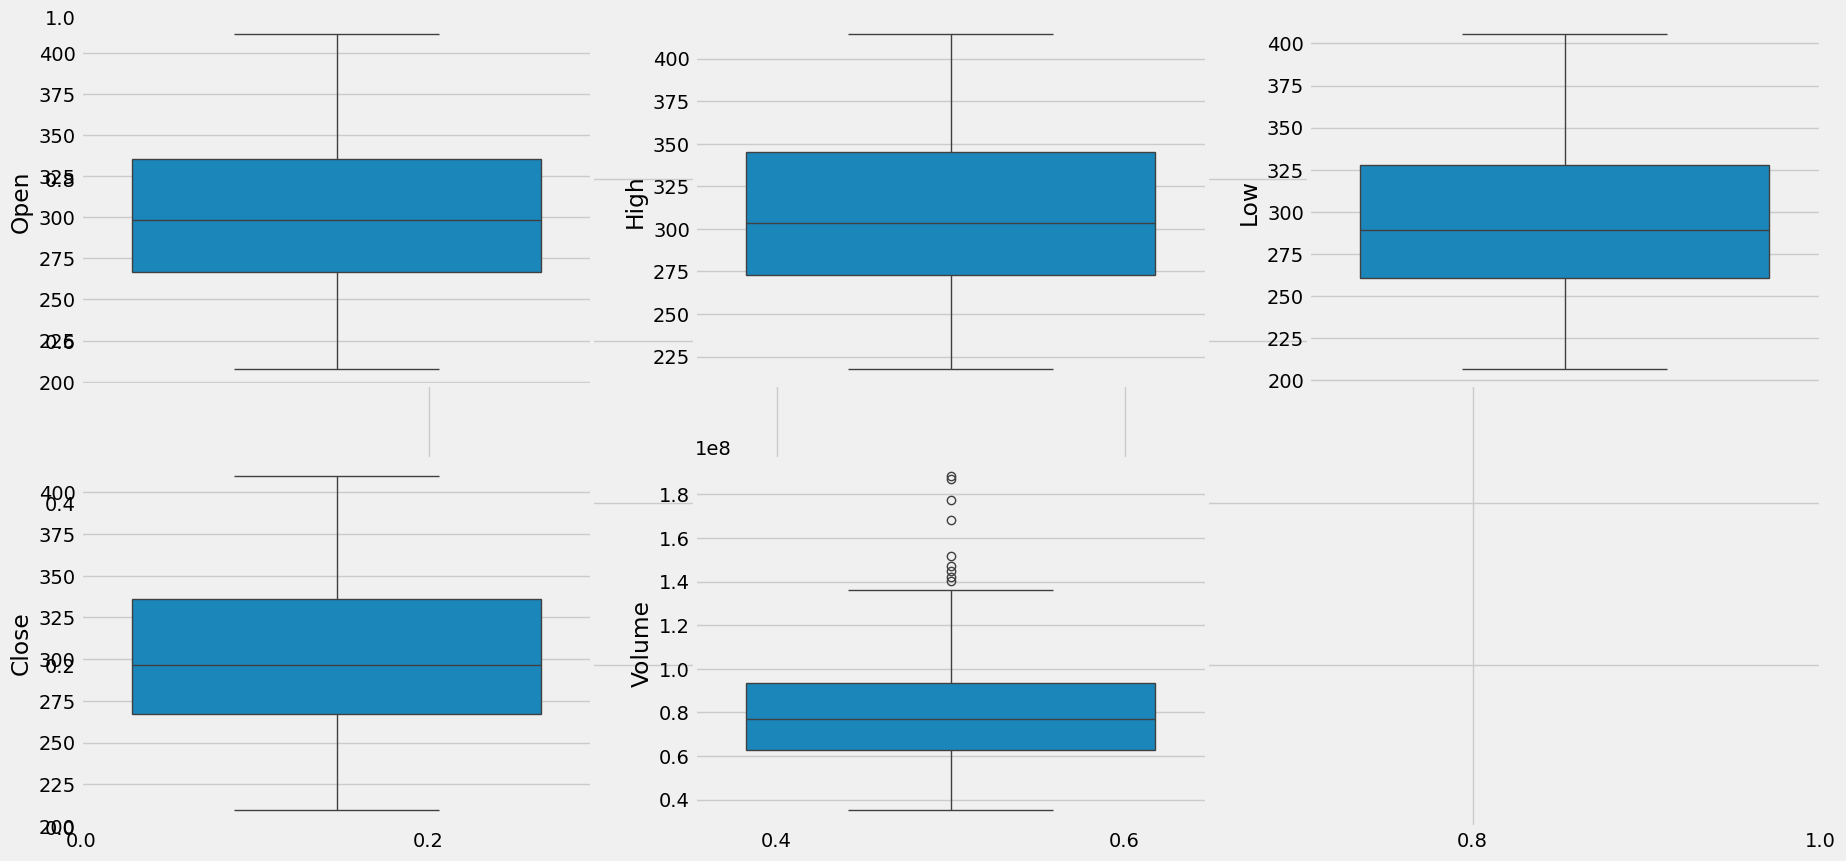

In [142]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [143]:
import pandas as pd

# Assume 'df' is your DataFrame with the 'Date' column

# Convert the 'Date' column to a proper datetime format
# The 'errors='coerce'' handles any dates that don't fit the format,
# turning them into 'NaT' (Not a Time) which prevents the code from crashing.
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract the day, month, and year using the .dt accessor
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

# Display the first few rows to confirm the new columns
print(df.head())

        Date        Open        High         Low       Close    Volume  day  \
0 2021-09-29  259.933319  264.500000  256.893341  260.436676  62828700   29   
1 2021-09-30  260.333344  263.043335  258.333344  258.493347  53868000   30   
2 2021-10-01  259.466675  260.260010  254.529999  258.406677  51094200    1   
3 2021-10-04  265.500000  268.989990  258.706665  260.510010  91449900    4   
4 2021-10-05  261.600006  265.769989  258.066681  260.196655  55297800    5   

   month  year  
0      9  2021  
1      9  2021  
2     10  2021  
3     10  2021  
4     10  2021  


In [144]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,62828700,29,9,2021,1
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,53868000,30,9,2021,1
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,51094200,1,10,2021,0
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,91449900,4,10,2021,0
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,55297800,5,10,2021,0


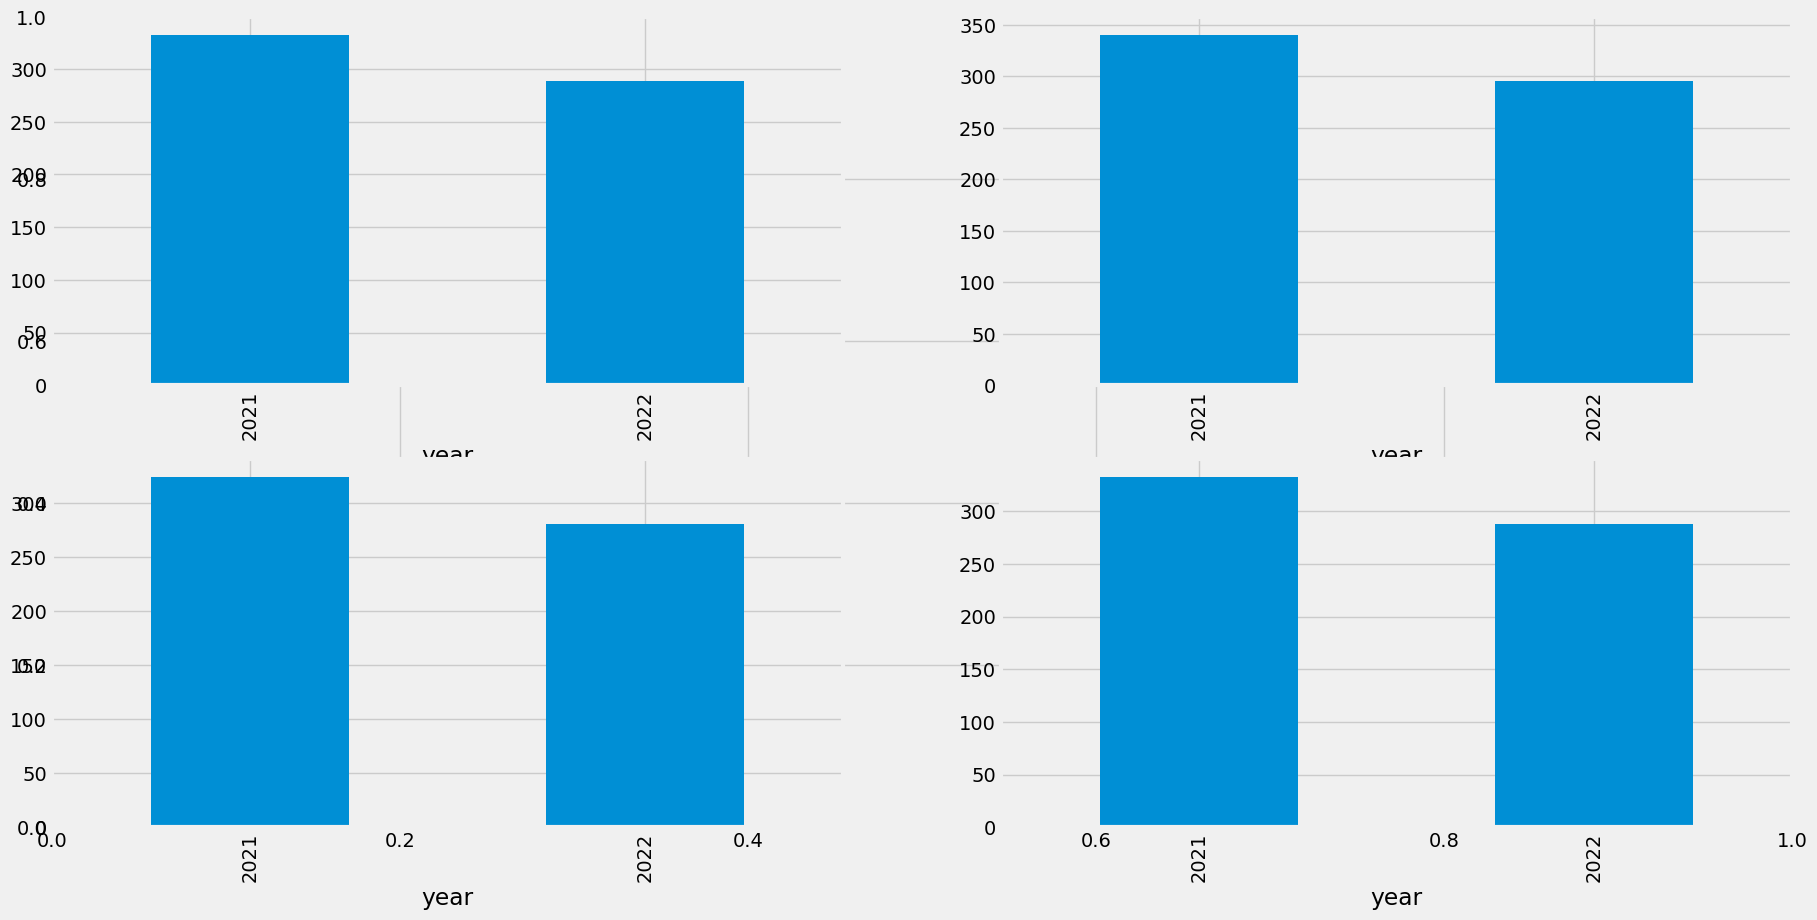

In [145]:
data_grouped = df.drop('Date', axis=1).groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()



In [146]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

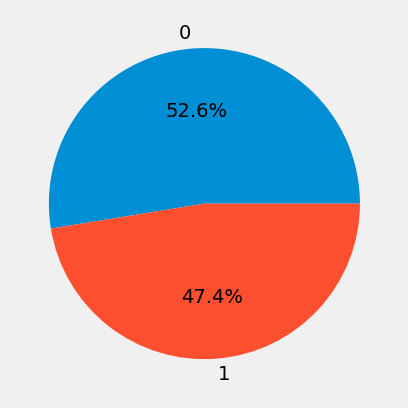

In [147]:
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

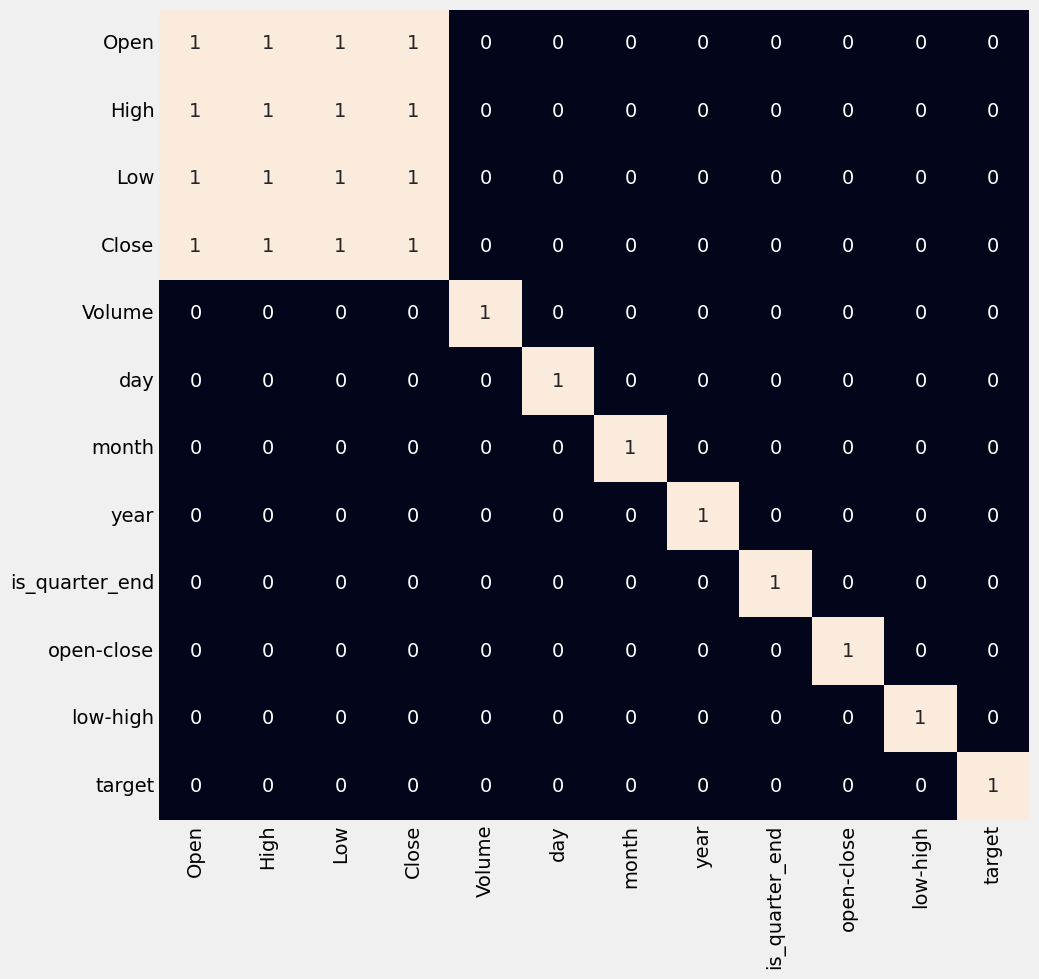

In [148]:
plt.figure(figsize=(10, 10)) 

# As our concern is with the highly 
# correlated features only so, we will visualize 
# our heatmap as per that criteria only. 
sb.heatmap(df.drop('Date', axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()



In [149]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(227, 3) (26, 3)


In [150]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5627039627039626
Validation Accuracy :  0.40625

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.6187257187257187
Validation Accuracy :  0.46875

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Training Accuracy :  1.0
Val

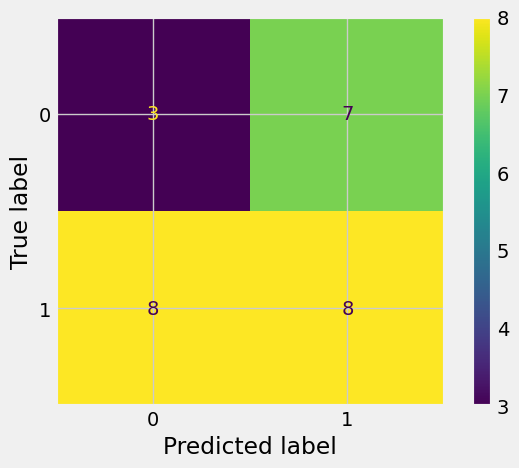

In [151]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()



# 4. Share Price Forecasting Using Facebook Prophet

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import prophet as fbp
from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.style.use('fivethirtyeight') 



In [153]:
df = pd.read_csv('Share-Price-Forecasting-Using-Facebook-Prophet---Dataset.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-27,15.315000,15.5120,15.131500,15.337500,15.337500,58406000
1,2015-01-28,15.490500,15.5755,15.190000,15.195500,15.195500,61276000
2,2015-01-29,15.236500,15.6400,14.966500,15.589000,15.589000,173132000
3,2015-01-30,17.316000,17.9750,17.037001,17.726500,17.726500,477122000
4,2015-02-02,17.502501,18.2500,17.500500,18.223499,18.223499,204638000


In [154]:
# add two columnsin dataframe having values as Date and Adj Close
df[['ds', 'y']] = df[['Date', 'Adj Close']]
# Subset two columns from data frame
df = df[['ds', 'y']]

df.head()

,ds,y
0,2015-01-27,15.337500
1,2015-01-28,15.195500
2,2015-01-29,15.589000
3,2015-01-30,17.726500
4,2015-02-02,18.223499


In [155]:
# split data frame  into two parts train and test
split_date = "2019-07-21"
df_train = df.loc[df.ds <= split_date].copy()
df_test = df.loc[df.ds > split_date].copy()

In [156]:
# Instantiate prophet 
model = fbp.Prophet()
# fit the training data 
model.fit(df_train)

21:27:06 - cmdstanpy - INFO - Chain [1] start processing
21:27:06 - cmdstanpy - INFO - Chain [1] done processing


In [157]:
forecast = model.predict(df_test)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1006,2023-07-20,108.141641,-133.060206,361.007754,-139.641510,354.602746,7.246776,7.246776,7.246776,1.294472,1.294472,1.294472,5.952304,5.952304,5.952304,0.0,0.0,0.0,115.388417
1007,2023-07-21,108.154157,-134.027785,363.012284,-140.039268,354.995414,7.125836,7.125836,7.125836,1.138373,1.138373,1.138373,5.987463,5.987463,5.987463,0.0,0.0,0.0,115.279993
1008,2023-07-24,108.191704,-134.028773,360.579234,-140.482479,355.413113,7.065573,7.065573,7.065573,1.060789,1.060789,1.060789,6.004784,6.004784,6.004784,0.0,0.0,0.0,115.257277
1009,2023-07-25,108.204219,-133.952012,361.096956,-141.263479,355.806999,7.270404,7.270404,7.270404,1.287077,1.287077,1.287077,5.983326,5.983326,5.983326,0.0,0.0,0.0,115.474623
1010,2023-07-26,108.216735,-135.114422,363.475937,-141.699716,356.202104,7.252485,7.252485,7.252485,1.302474,1.302474,1.302474,5.950011,5.950011,5.950011,0.0,0.0,0.0,115.469220


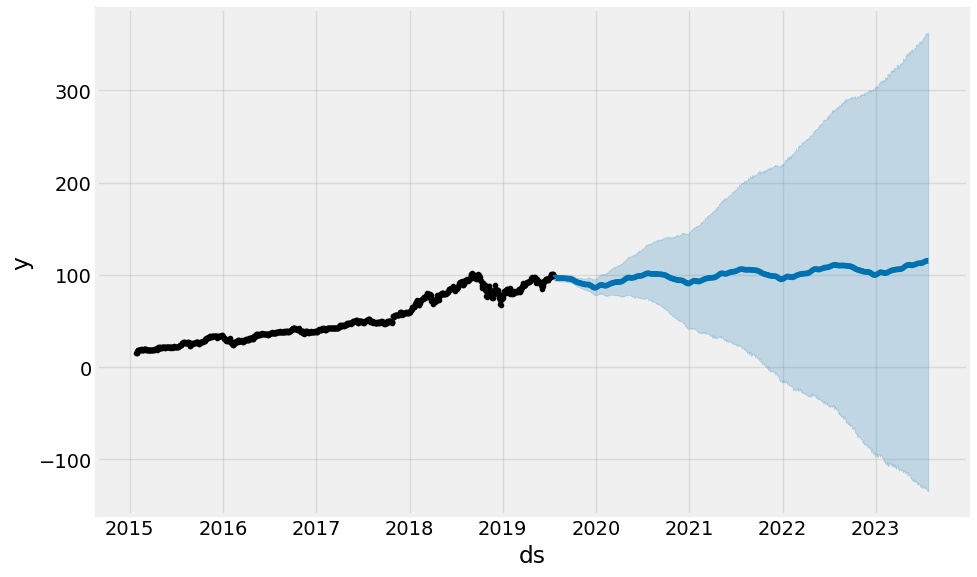

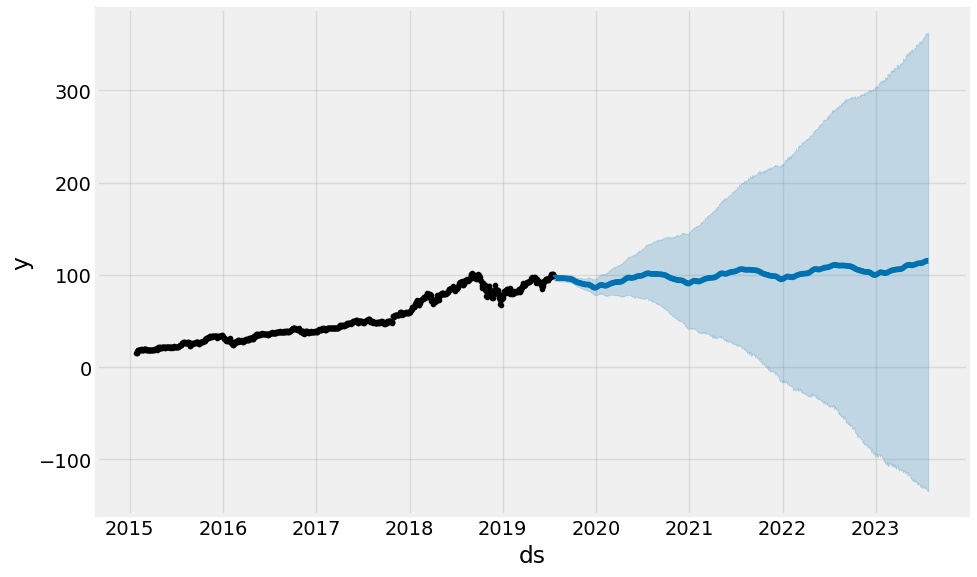

In [158]:
model.plot(forecast)

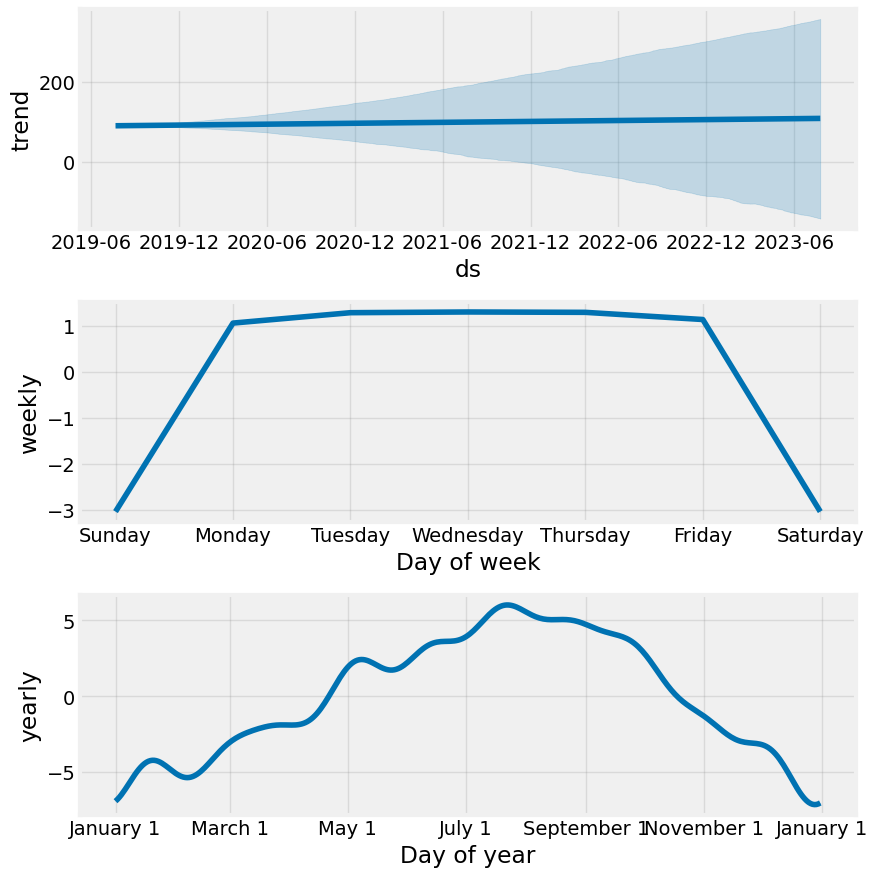

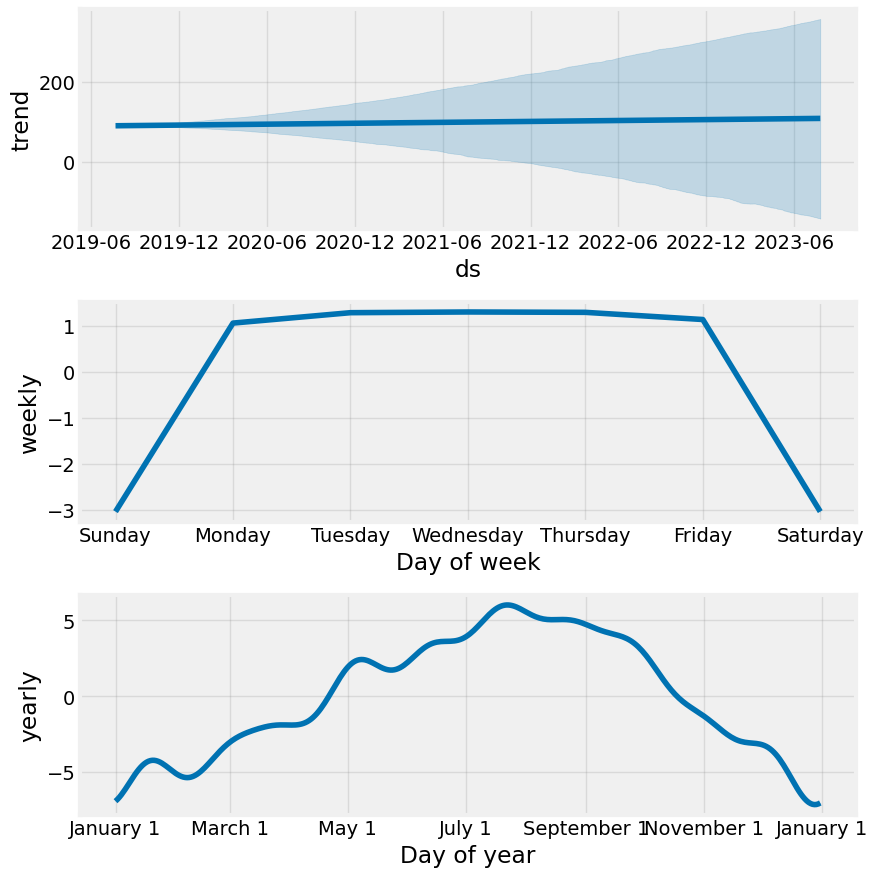

In [159]:
# plot graphs of different components:
model.plot_components(forecast)

In [160]:
# code
print("Mean Squared Error (MSE):", mean_squared_error(y_true = df_test["y"], y_pred = forecast['yhat']))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_true = df_test["y"], y_pred = forecast['yhat']))

Mean Squared Error (MSE): 1953.8895254992644
Mean Absolute Error (MAE): 34.47221966995942


In [161]:
def mean_abs_perc_err(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Mean Absolute % Error (MAPE): ", mean_abs_perc_err(y_true = np.asarray(df_test["y"]), y_pred = np.asarray(forecast['yhat'])))

Mean Absolute % Error (MAPE):  22.71283124006329


# 5. Microsoft Stock Price Prediction with Machine Learning

In [162]:
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

In [163]:
microsoft = pd.read_csv('MicrosoftStock.csv', usecols=lambda col: col != 'index')
print(microsoft.head())

         date   open   high    low  close    volume  Name
0  2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1  2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2  2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT
3  2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT
4  2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT


In [164]:
microsoft.shape

(1259, 7)

In [165]:
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [166]:
microsoft.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,95.140000,96.070000,93.720000,95.010000,2.483542e+08


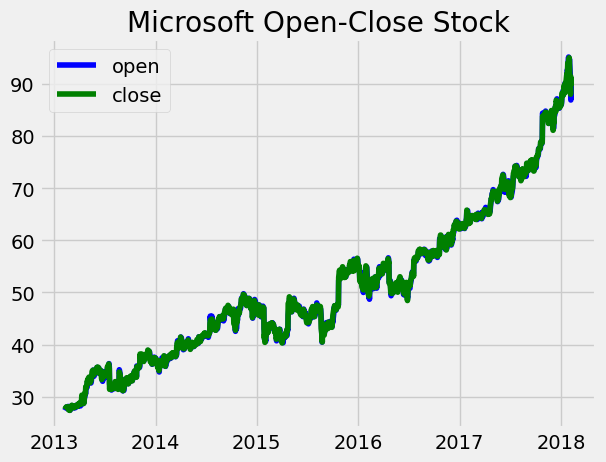

In [167]:
microsoft['date'] = pd.to_datetime(microsoft['date'])
plt.plot(microsoft['date'], 
		microsoft['open'], 
		color="blue", 
		label="open") 
plt.plot(microsoft['date'], 
		microsoft['close'], 
		color="green", 
		label="close") 
plt.title("Microsoft Open-Close Stock") 
plt.legend() 



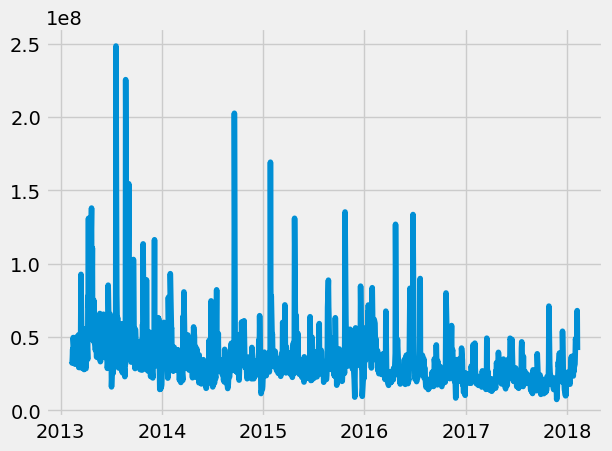

In [168]:
plt.plot(microsoft['date'],
         microsoft['volume'])
plt.show()

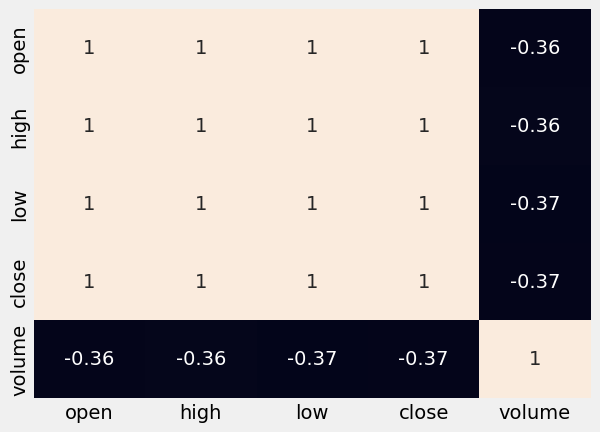

In [169]:
sns.heatmap(microsoft.select_dtypes(include=np.number).corr(), 
			annot=True, 
			cbar=False) 
plt.show() 



Text(0.5, 1.0, 'Microsoft Stock Prices')

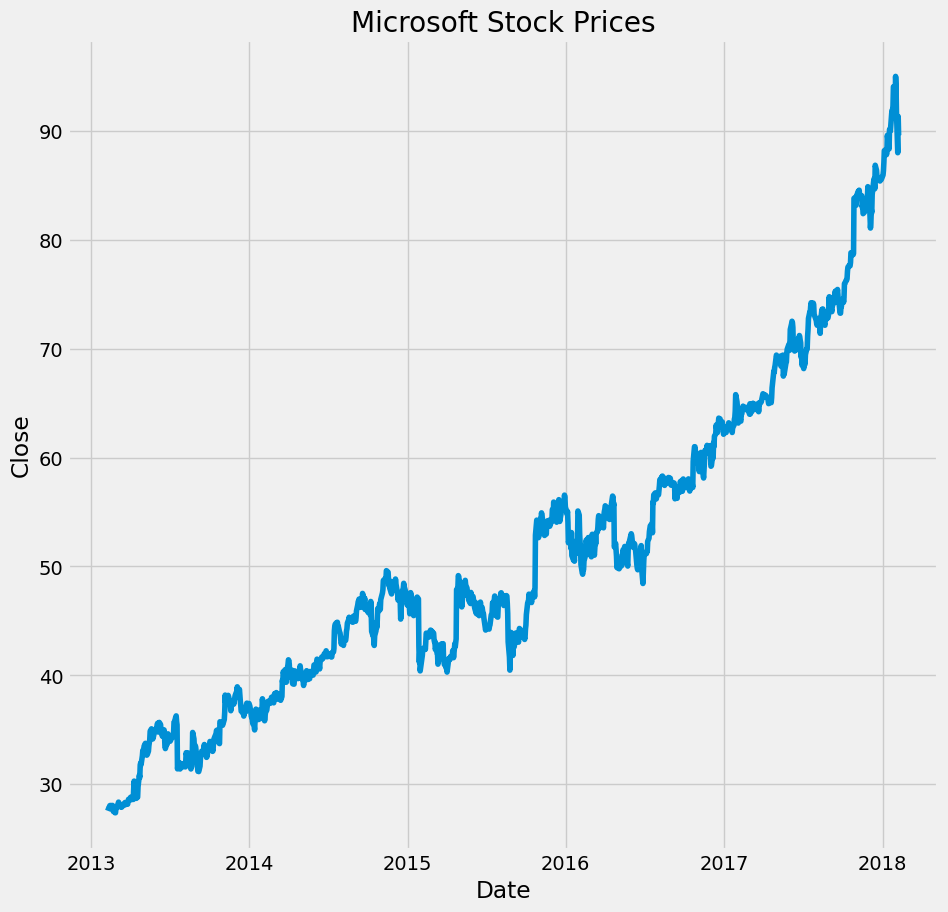

In [170]:
microsoft['date'] = pd.to_datetime(microsoft['date'])
prediction = microsoft.loc[(microsoft['date']
                            > datetime(2013, 1, 1))
                            & (microsoft['date']
                            < datetime(2018, 1, 1))]

plt.figure(figsize=(10, 10))
plt.plot(microsoft['date'], microsoft['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Microsoft Stock Prices")

In [171]:
# prepare the training set samples 
msft_close = microsoft.filter(['close']) 
dataset = msft_close.values 
training = int(np.ceil(len(dataset) * .95)) 

# scale the data 
ss = StandardScaler() 
ss = ss.fit_transform(dataset) 

train_data = ss[0:int(training), :] 

x_train = [] 
y_train = [] 

# considering 60 as the batch size, 
# create the X_train and y_train 
for i in range(60, len(train_data)): 
	x_train.append(train_data[i-60:i, 0]) 
	y_train.append(train_data[i, 0]) 

x_train, y_train = np.array(x_train), np.array(y_train) 
X_train = np.reshape(x_train, 
					(x_train.shape[0], 
					x_train.shape[1], 1)) 



In [172]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape
                            =(X_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(128))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))

print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [173]:
from keras.metrics import RootMeanSquaredError 
model.compile(optimizer='adam', 
            loss='mae', 
            metrics=[RootMeanSquaredError()]) 

history = model.fit(X_train, y_train, 
					epochs=20) 



Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - loss: 0.1954 - root_mean_squared_error: 0.3139
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.1025 - root_mean_squared_error: 0.1400
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0951 - root_mean_squared_error: 0.1305
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0969 - root_mean_squared_error: 0.1313
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0948 - root_mean_squared_error: 0.1278
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0975 - root_mean_squared_error: 0.1336
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0866 - root_mean_squared_error: 0.1152
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0849 - root_mean_squared_error: 0.1124
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0822 - root_mean_squared_error: 0.1101
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0798 - root_mean_squared_error: 0.1088

In [174]:
testing = ss[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(testing)):
    x_test.append(testing[i-60:i, 0])

x_test = np.array(x_test)
X_test = np.reshape(x_test,
                    (x_test.shape[0],
                     x_test.shape[1], 1))

pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


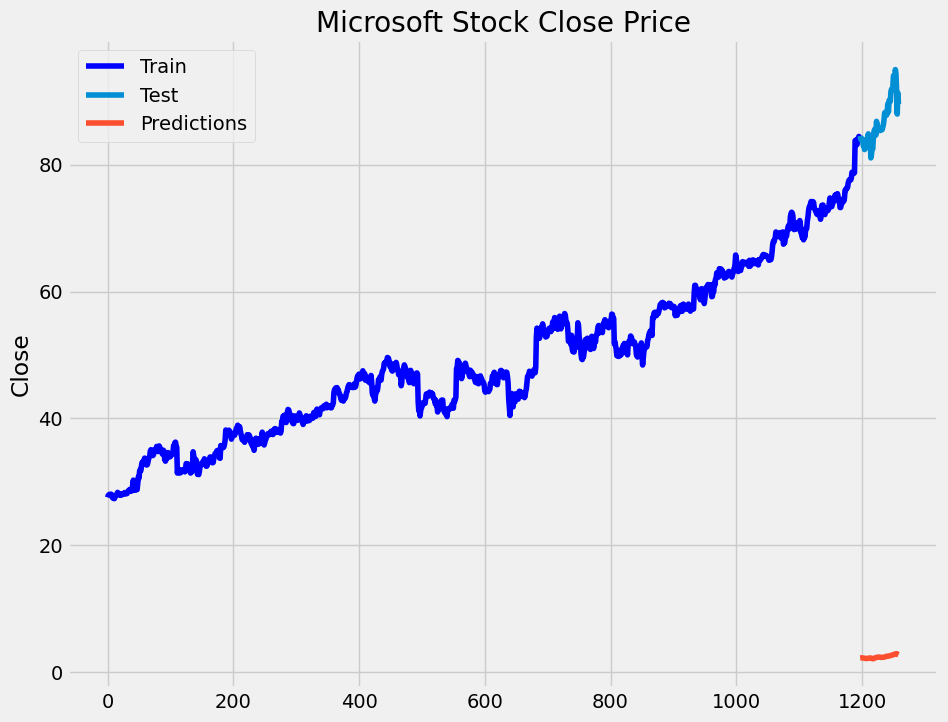

In [175]:
train = microsoft[:training]
test = microsoft[training:]
test['Predictions'] = pred

plt.figure(figsize=(10, 8))
plt.plot(train['close'], c="b")
plt.plot(test[['close', 'Predictions']])
plt.title('Microsoft Stock Close Price')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])